## Librerias

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image

import ML_tool_box_basic_plot as tbb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None) 

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("data/portatiles_train.csv", index_col = 0)
df.index.name = None

## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  912 non-null    object 
 1   TypeName                 912 non-null    object 
 2   Inches                   912 non-null    float64
 3   ScreenResolution         912 non-null    object 
 4   Cpu                      912 non-null    object 
 5   Ram                      912 non-null    object 
 6   Memory                   912 non-null    object 
 7   Gpu                      912 non-null    object 
 8   OpSys                    912 non-null    object 
 9   Weight                   912 non-null    object 
 10  Price_in_euros           912 non-null    float64
 11  ram_gb                   912 non-null    int64  
 12  weight_kg                912 non-null    float64
 13  cluster_Company          912 non-null    int64  
 14  median_price_company     912 

## Data processing

In [4]:
# Outlier

filtro = df["Price_in_euros"] > 6000
df.loc[filtro]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,cluster_Company,median_price_company,median_price_typename,cluster_Inches,median_price_inches,Resolution_Type,Resolution_Pixels,Touchscreen,cluster_Resolution_Type,median_price_screen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Class,cluster_Cpu_Class,median_price_cpu_model,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Family,Gpu_Model,Integrada_Externa,cluster_Gpu,median_price_Gpu,cluster_OS,median_price_OS
200,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0,32,3.49,1,2749.0,1479.0,5,1409.0,3840x2160,8294400,1,5,2020.71,Intel,Core i7 7820HK,2.9,Core i,2,1180.7,1024,0,0,0,0,Nvidia,GeForce GTX,1080,1,5,1420.0,4,1043.0


In [5]:
df.drop(index=200, inplace=True)
filtro = df["Price_in_euros"] > 6000
df.loc[filtro]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,cluster_Company,median_price_company,median_price_typename,cluster_Inches,median_price_inches,Resolution_Type,Resolution_Pixels,Touchscreen,cluster_Resolution_Type,median_price_screen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Class,cluster_Cpu_Class,median_price_cpu_model,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Family,Gpu_Model,Integrada_Externa,cluster_Gpu,median_price_Gpu,cluster_OS,median_price_OS


In [6]:
target = "Price_in_euros"

Cambiamos el valor de varias variables a category para poder usarlas con mejores garantias en algunos modelos.

In [7]:
columnas_type_category = ['cluster_Company', 'cluster_Inches', 'cluster_Resolution_Type', 'cluster_Cpu_Class', 'cluster_Gpu', 'cluster_OS']
df[columnas_type_category] = df[columnas_type_category].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 755 to 229
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Company                  911 non-null    object  
 1   TypeName                 911 non-null    object  
 2   Inches                   911 non-null    float64 
 3   ScreenResolution         911 non-null    object  
 4   Cpu                      911 non-null    object  
 5   Ram                      911 non-null    object  
 6   Memory                   911 non-null    object  
 7   Gpu                      911 non-null    object  
 8   OpSys                    911 non-null    object  
 9   Weight                   911 non-null    object  
 10  Price_in_euros           911 non-null    float64 
 11  ram_gb                   911 non-null    int64   
 12  weight_kg                911 non-null    float64 
 13  cluster_Company          911 non-null    category
 14  median_price_

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,cluster_Company,median_price_company,median_price_typename,cluster_Inches,median_price_inches,Resolution_Type,Resolution_Pixels,Touchscreen,cluster_Resolution_Type,median_price_screen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Class,cluster_Cpu_Class,median_price_cpu_model,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Family,Gpu_Model,Integrada_Externa,cluster_Gpu,median_price_Gpu,cluster_OS,median_price_OS
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,0,964.925,685.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i3 6006U,2.0,Core i,2,1180.7,256,0,0,0,0,Intel,HD Graphics,520,0,3,1002.578333,4,1043.00
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,0,964.925,1479.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i7 6700HQ,2.6,Core i,2,1180.7,0,1024,0,0,0,Nvidia,GeForce GTX,960<U+039C>,1,5,1420.000000,4,1043.00
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,0,964.925,685.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i7 7500U,2.7,Core i,2,1180.7,0,1024,0,0,0,Nvidia,GeForce,930MX,1,3,1002.578333,4,1043.00
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,4,1678.800,1499.0,4,1412.331667,1440x900,1296000,0,2,1310.55,Intel,Core i5,1.8,Core i,2,1180.7,0,0,128,0,0,Intel,HD Graphics,6000,0,3,1002.578333,3,1518.55
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,0,964.925,685.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i3 6006U,2.0,Core i,2,1180.7,0,1024,0,0,0,AMD,Radeon R5 M,M430,1,1,505.140625,0,471.75


In [9]:
features_all_RF = df.iloc[:, [11,14,15,17,20,22,28,29,30,31,32,37,39,41]]
columnas_no_object = features_all_RF.select_dtypes(exclude=['object'])
features_num = list(columnas_no_object.columns)
features_num

['ram_gb',
 'median_price_company',
 'median_price_typename',
 'median_price_inches',
 'Touchscreen',
 'median_price_screen',
 'median_price_cpu_model',
 'SSD_(GB)',
 'HDD_(GB)',
 'Flash_Storage_(GB)',
 'Hybrid_(GB)',
 'Integrada_Externa',
 'median_price_Gpu',
 'median_price_OS']

## Test de Person para correlación entre variables y su significancia ##
                   Feature      Corr Direction        p-value
1                   ram_gb  0.731569         +  2.154624e-153
10                SSD_(GB)  0.660719         +  2.320678e-115
4    median_price_typename  0.636512         +  1.222083e-104
7      median_price_screen  0.604869         +   5.382647e-92
14        median_price_Gpu  0.531594         +   1.384579e-67
9   median_price_cpu_model  0.494037         +   3.137037e-57
5      median_price_inches  0.481828         +   3.926738e-54
6        Resolution_Pixels  0.476587         +   7.687728e-53
8            CPU_Frequency  0.430590         +   2.035942e-42
3     median_price_company  0.356599         +   1.050097e-28
15         median_price_OS  0.339384         +   5.413060e-26
2                weight_kg  0.185486         +   1.702337e-08
11                HDD_(GB)  0.071828         -   3.017445e-02
0                   Inches  0.060031         +   7.013482e-

['ram_gb',
 'median_price_company',
 'median_price_typename',
 'median_price_inches',
 'Touchscreen',
 'median_price_screen',
 'median_price_cpu_model',
 'SSD_(GB)',
 'HDD_(GB)',
 'Flash_Storage_(GB)',
 'Hybrid_(GB)',
 'Integrada_Externa',
 'median_price_Gpu',
 'median_price_OS']

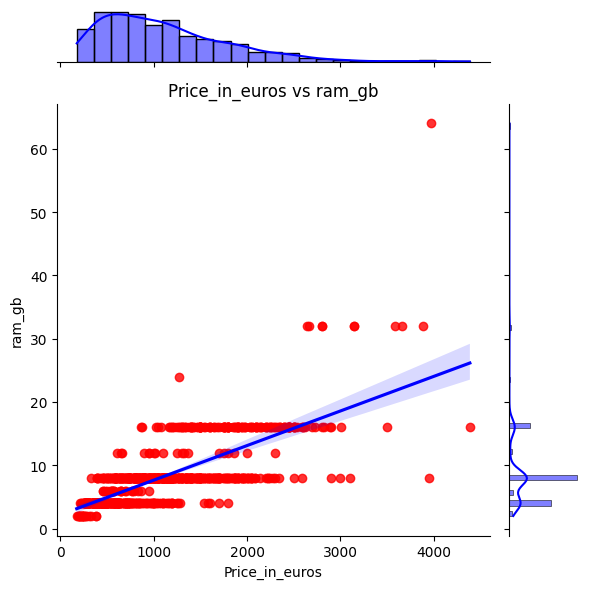

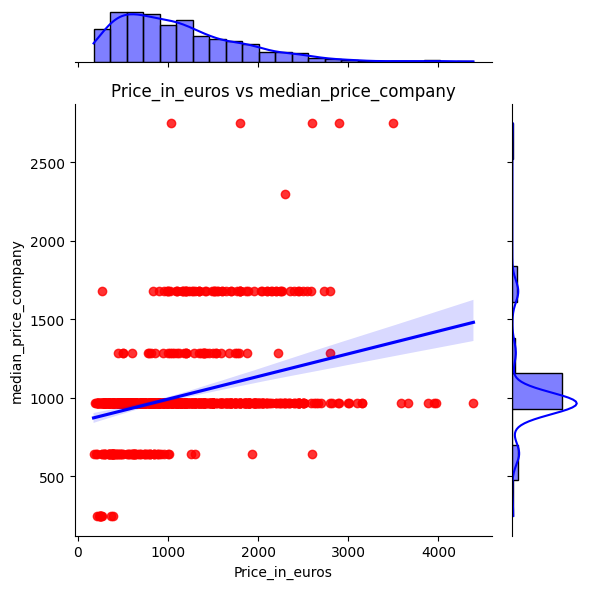

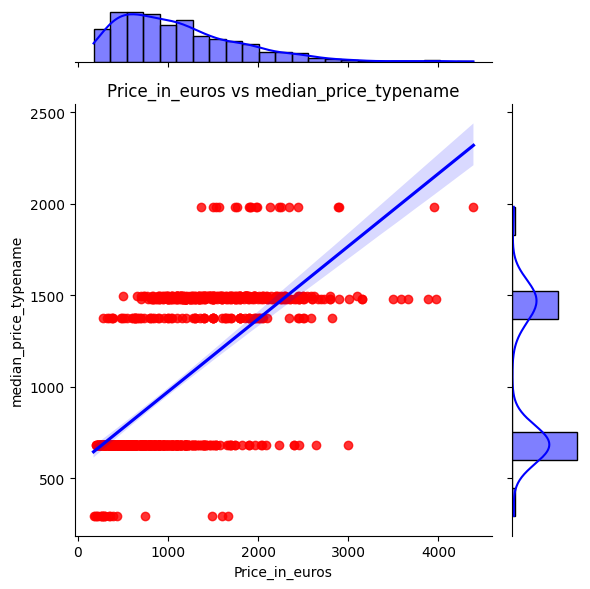

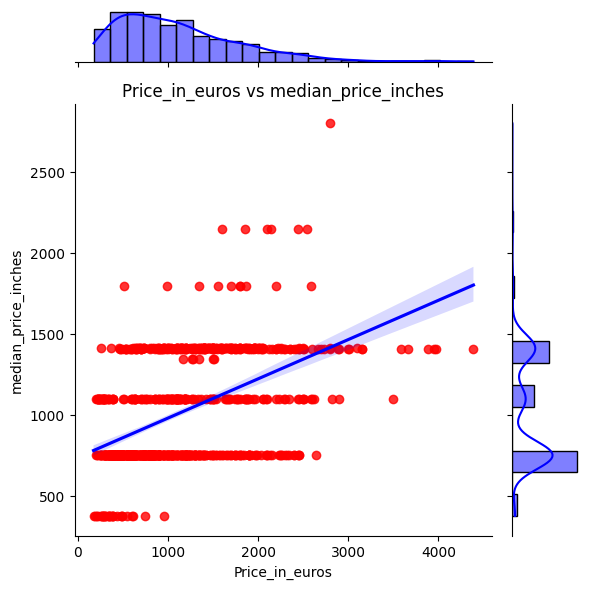

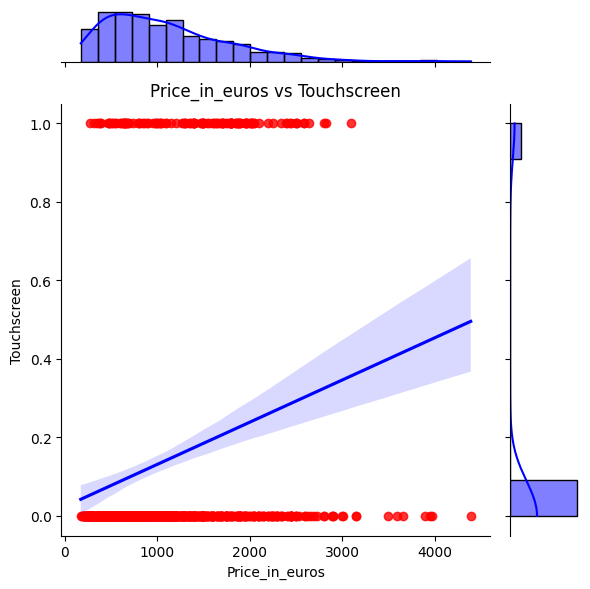

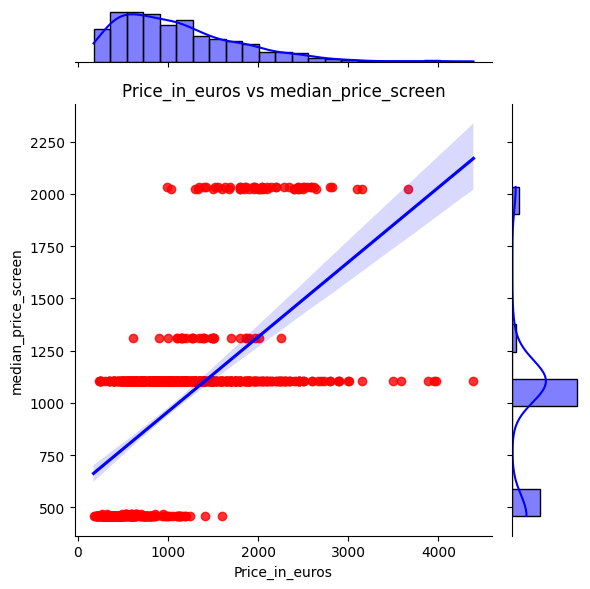

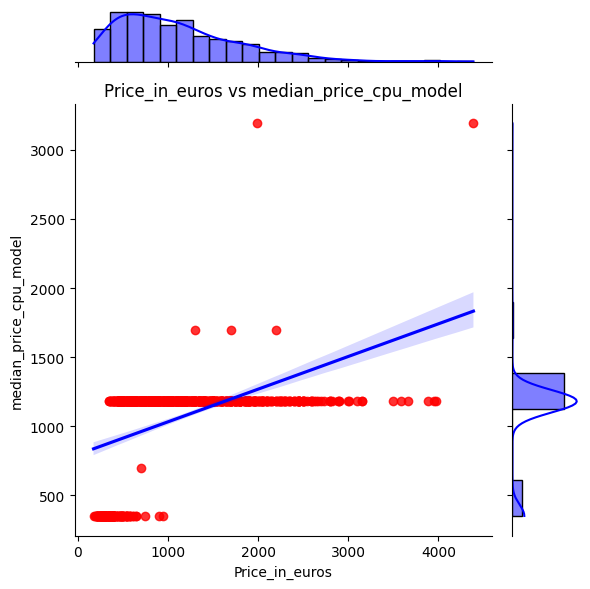

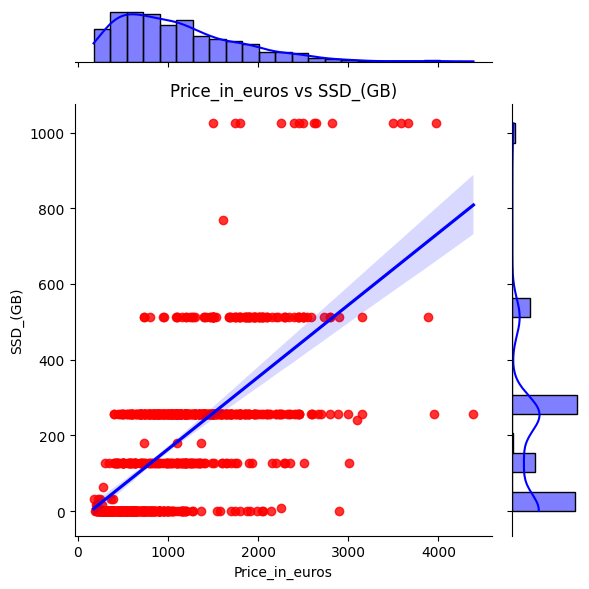

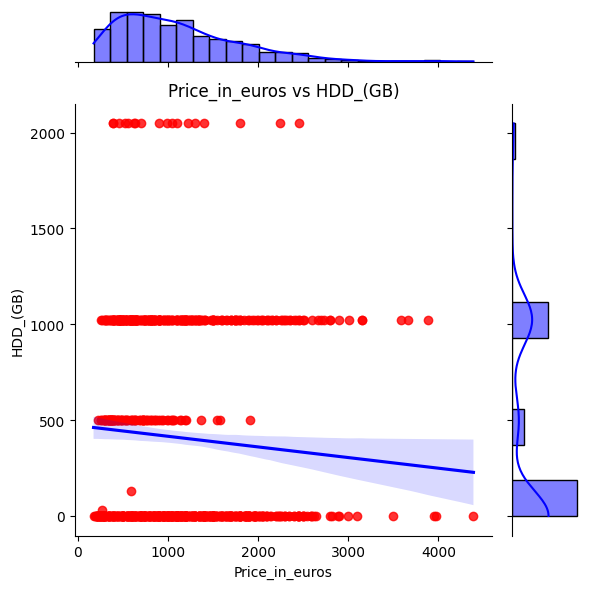

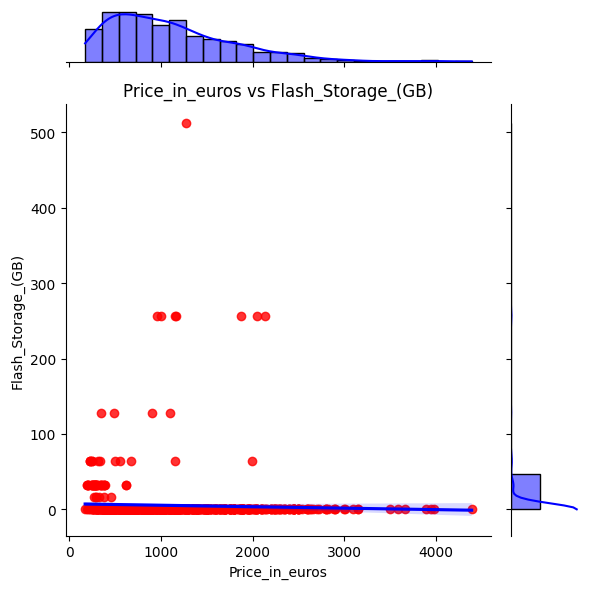

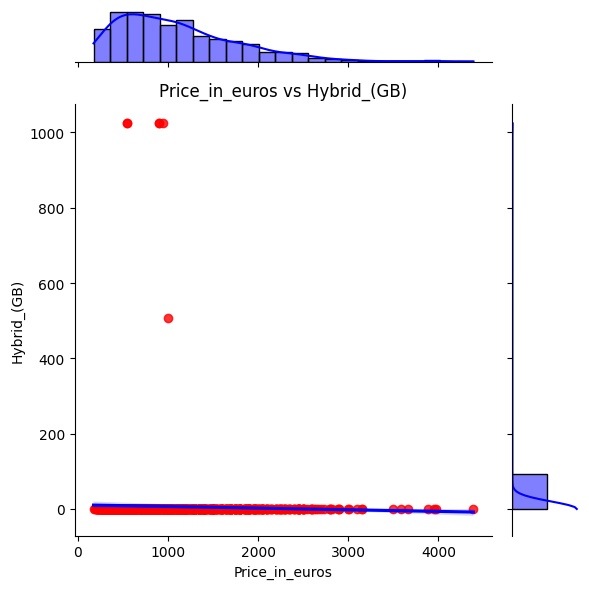

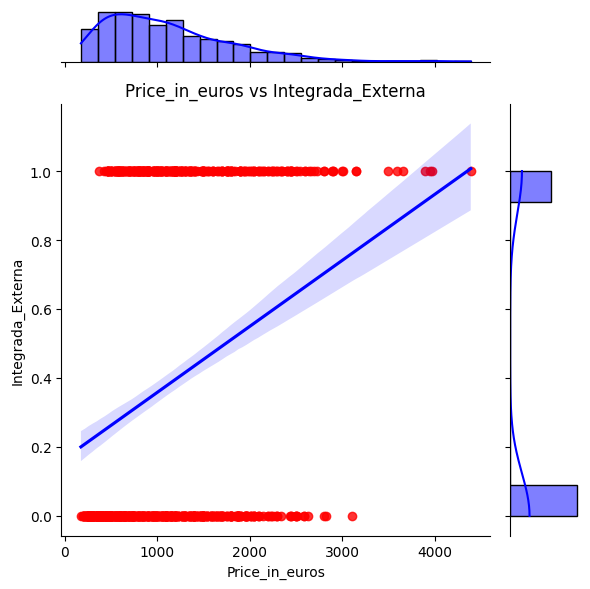

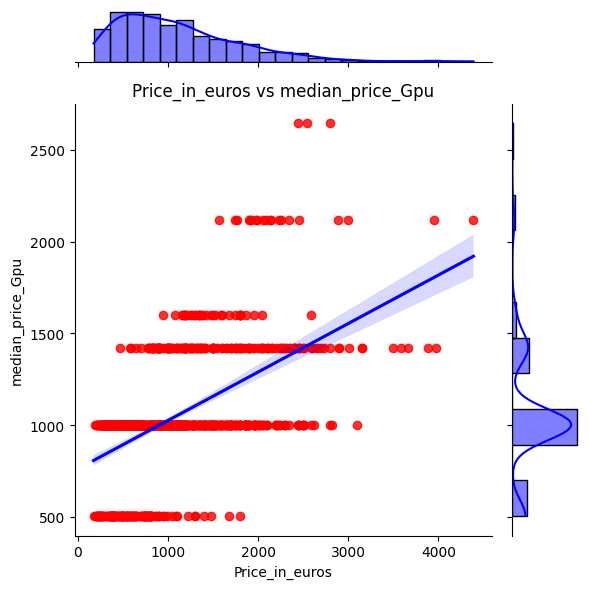

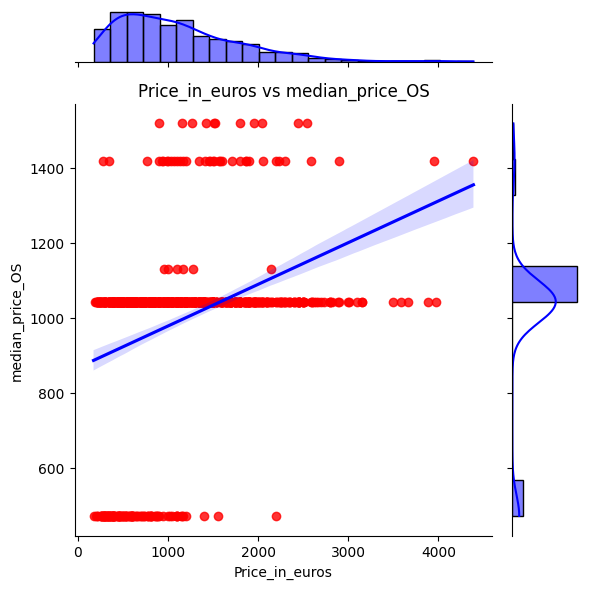

In [10]:
tbb.REGRE_FN_BI_FeaNum_hist_scatter_plot_with_regression(df, target, columnas=features_num, umbral_categorias_feature=2)

In [11]:
features_all_RF_def = df.iloc[:, [11,14,15,17,22,28,29,37,39,41]]
columnas_no_object = features_all_RF_def.select_dtypes(exclude=['object'])
features_num_def = list(columnas_no_object.columns)
features_num_def

['ram_gb',
 'median_price_company',
 'median_price_typename',
 'median_price_inches',
 'median_price_screen',
 'median_price_cpu_model',
 'SSD_(GB)',
 'Integrada_Externa',
 'median_price_Gpu',
 'median_price_OS']

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [12]:
X = df[features_num_def].copy()
y = df['Price_in_euros'].copy()
X.shape

(911, 10)

In [13]:
X

,ram_gb,median_price_company,median_price_typename,median_price_inches,median_price_screen,median_price_cpu_model,SSD_(GB),Integrada_Externa,median_price_Gpu,median_price_OS
755,8,964.925,685.000,750.000000,1103.00,1180.700,256,0,1002.578333,1043.00
618,16,964.925,1479.000,750.000000,1103.00,1180.700,0,1,1420.000000,1043.00
909,8,964.925,685.000,750.000000,1103.00,1180.700,0,1,1002.578333,1043.00
2,8,1678.800,1499.000,1412.331667,1310.55,1180.700,0,0,1002.578333,1518.55
286,4,964.925,685.000,750.000000,1103.00,1180.700,0,1,505.140625,471.75
...,...,...,...,...,...,...,...,...,...,...
28,8,964.925,685.000,750.000000,1103.00,1180.700,256,0,505.140625,1043.00
1160,8,964.925,1378.495,1412.331667,1103.00,1180.700,256,0,1002.578333,1043.00
78,8,964.925,685.000,750.000000,1103.00,1180.700,0,0,1002.578333,471.75
23,4,964.925,685.000,750.000000,459.00,350.616,0,0,505.140625,471.75


In [14]:
y.shape

(911,)

### 2. Dividir X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [16]:
X_train.head(5)

,ram_gb,median_price_company,median_price_typename,median_price_inches,median_price_screen,median_price_cpu_model,SSD_(GB),Integrada_Externa,median_price_Gpu,median_price_OS
1118,8,964.925000,1984.0,1409.000000,1103.000,1180.700,0,1,1420.000000,1417.50
563,4,247.448333,685.0,1412.331667,1103.000,350.616,0,0,505.140625,1043.00
275,8,1678.800000,1499.0,1412.331667,2032.333,1180.700,512,0,1600.825000,1518.55
1211,8,1678.800000,1499.0,1347.350000,1310.550,1180.700,0,0,1002.578333,1131.00
131,16,964.925000,685.0,1409.000000,1103.000,1180.700,256,0,505.140625,1043.00


In [17]:
y_train

1118    2899.00
563      255.00
275     1958.90
1211    1163.00
131     1396.00
         ...   
95      1195.00
647     2399.00
187      793.00
775      470.34
762     1096.00
Name: Price_in_euros, Length: 728, dtype: float64

### 3. Baseline de modelos


In [18]:
model = RandomForestRegressor(max_depth = 5, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

In [19]:
predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

302.3112453863824

In [20]:
from sklearn.model_selection import cross_val_score


# Definir el modelo
model_cross = RandomForestRegressor(max_depth=5, random_state=42)

# Realizar el Cross-Validation con 5 folds
scores = cross_val_score(model_cross, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el RMSE promedio y mostrar el resultado
rmse_scores = np.sqrt(-scores)
print(f"RMSE por pliegue: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean()}")

RMSE por pliegue: [301.22454172 337.26997698 293.73169999 362.79258566 329.22648233]
RMSE promedio: 324.84905733453206


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [21]:
X_pred = pd.read_csv("data/portatiles_test.csv", index_col = 0)
X_pred.index.name = None
X_pred.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,cluster_Company,median_price_company,median_price_typename,cluster_Inches,median_price_inches,Resolution_Type,Resolution_Pixels,Touchscreen,cluster_Resolution_Type,median_price_screen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Class,cluster_Cpu_Class,median_price_cpu_model,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Family,Gpu_Model,Integrada_Externa,cluster_Gpu,median_price_Gpu,cluster_OS,median_price_OS
209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,0,964.925,1479.000,1.0,750.0,1920x1080,2073600,0,3.0,1103.0,Intel,Core i7 7700HQ,2.8,Core i,2,1180.700,256,0,0,0,0,Nvidia,GeForce GTX,1060,1.0,5.0,1420.000000,0,471.75
1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,6,645.250,685.000,1.0,750.0,1366x768,1049088,0,4.0,459.0,Intel,Celeron Dual Core N3060,1.6,Celeron,0,350.616,0,1024,0,0,0,Intel,HD Graphics,400,0.0,3.0,1002.578333,0,471.75
1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,0,964.925,685.000,1.0,750.0,1366x768,1049088,0,4.0,459.0,Intel,Core i3 6006U,2.0,Core i,2,1180.700,0,1024,0,0,0,Intel,HD Graphics,520,0.0,3.0,1002.578333,0,471.75
1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,0,964.925,1378.495,1.0,750.0,1920x1080,2073600,1,3.0,1103.0,Intel,Core i5 7200U,2.5,Core i,2,1180.700,0,0,128,0,0,Intel,HD Graphics,620,0.0,3.0,1002.578333,4,1043.00
1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,0,964.925,685.000,2.0,1097.5,1920x1080,2073600,0,3.0,1103.0,Intel,Core i5 7200U,2.5,Core i,2,1180.700,0,1024,0,0,0,Intel,HD Graphics,620,0.0,3.0,1002.578333,4,1043.00


In [22]:
X_pred.shape

(391, 41)

In [23]:
X_pred = X_pred[features_num_def]

In [24]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ram_gb                  391 non-null    int64  
 1   median_price_company    391 non-null    float64
 2   median_price_typename   391 non-null    float64
 3   median_price_inches     390 non-null    float64
 4   median_price_screen     390 non-null    float64
 5   median_price_cpu_model  391 non-null    float64
 6   SSD_(GB)                391 non-null    int64  
 7   Integrada_Externa       390 non-null    float64
 8   median_price_Gpu        388 non-null    float64
 9   median_price_OS         391 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 33.6 KB


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 1118 to 762
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ram_gb                  728 non-null    int64  
 1   median_price_company    728 non-null    float64
 2   median_price_typename   728 non-null    float64
 3   median_price_inches     728 non-null    float64
 4   median_price_screen     728 non-null    float64
 5   median_price_cpu_model  728 non-null    float64
 6   SSD_(GB)                728 non-null    int64  
 7   Integrada_Externa       728 non-null    int64  
 8   median_price_Gpu        728 non-null    float64
 9   median_price_OS         728 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 62.6 KB


In [26]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([1658.43105647,  326.2045339 ,  531.5846519 , 1117.40611358,
        736.35652058,  502.76785715,  767.81187336,  875.95518828,
       1292.33687473,  532.53561236, 2116.66095084, 1326.59347752,
        727.79614735, 1685.92738527,  841.2548954 ,  657.46467023,
       1934.58243987, 1428.53677433, 1340.62811738,  681.44152637,
       1511.62183987,  367.93490527,  860.64179625, 1323.13682282,
        673.83120235,  838.05361872,  695.80976023, 1064.4268846 ,
       2224.49382727, 1066.96325192, 2120.20452643,  642.18218082,
        668.99887748, 3181.00303164, 1677.37182216, 2087.31044452,
        662.59130949, 1653.84576381,  838.05361872, 1249.87319599,
        841.2548954 , 1366.3532045 ,  538.99976477, 1076.75423892,
       1231.27567438, 1183.28914414,  961.84241757,  691.3621156 ,
       1037.0924238 ,  514.13468909, 1594.71726404,  837.12845556,
       1284.61302574,  531.5846519 , 1849.91843919, 1410.7431623 ,
        704.51851493, 1066.96325192, 1218.92432114,  568.30018

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [27]:
# ¿Qué opináis?
# ¿Sí, no?

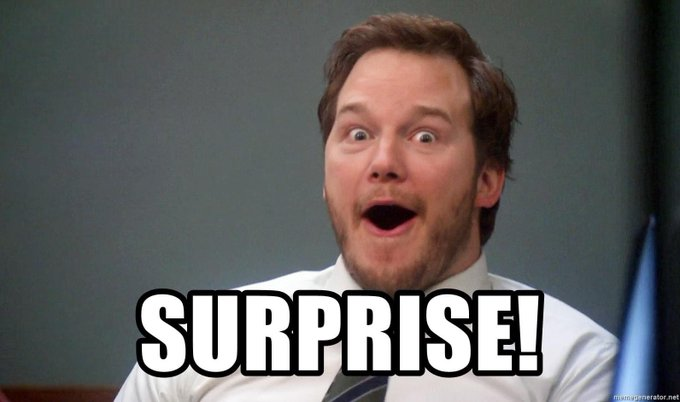

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [28]:
sample = pd.read_csv("data/sample_submission.csv")

In [29]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [30]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [31]:
submission = pd.DataFrame({"laptop_ID": X_pred.index, "Price_in_euros": predictions_submit})

In [32]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1658.431056
1,1281,326.204534
2,1168,531.584652
3,1231,1117.406114
4,1020,736.356521


In [33]:
submission.shape

(391, 2)

# Cambiar nombre de la ruta!!!

In [34]:
submission.to_csv("./data/submission_RandomForest.csv", index=False)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [35]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Manuel: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `laptops_test.csv`. Lloramos.")

In [36]:
chequeador(submission)

You're ready to submit!
